**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [552]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [555]:
data = pd.read_csv('data/coupons.csv')

In [557]:
data.head(2)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

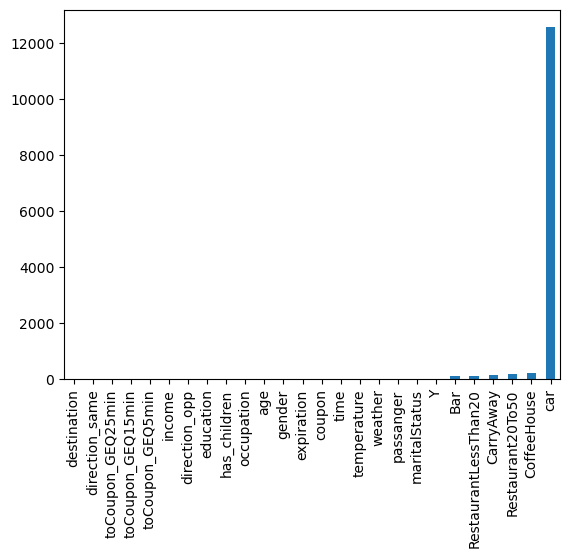

In [560]:
data.isnull().sum().sort_values().plot(kind = 'bar')
data.isnull().sum()

3. Decide what to do about your missing data -- drop, replace, other...

<Axes: >

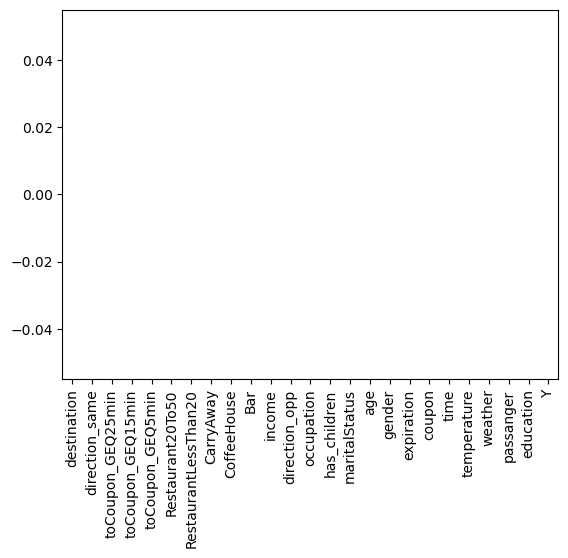

In [563]:
#Since almost the entire Car column is blank, we are going to drop it.
data.drop('car', axis=1, inplace=True)
#For the other columns that contain NaN values, we are going to drop their rows.
data = data.dropna()
data.isnull().sum().sort_values().plot(kind = 'bar')


4. What proportion of the total observations chose to accept the coupon?



<Axes: title={'center': 'Percentage of Coupon Acceptance'}>

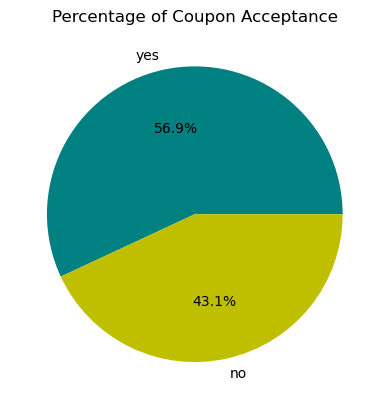

In [566]:
#Pandas plot using Matplotlib image generation
data = data.rename(columns={'Y':'coupon_accepted'})
data['coupon_accepted'] = data['coupon_accepted'].replace({1: 'yes', 0: 'no'})
data.coupon_accepted.value_counts().plot(kind='pie', title = 'Percentage of Coupon Acceptance', ylabel = '', autopct = '%1.1f%%', colors = ['teal', 'y'])

5. Use a bar plot to visualize the `coupon` column.

<Axes: title={'center': 'Number of Each Coupon'}, xlabel='coupon'>

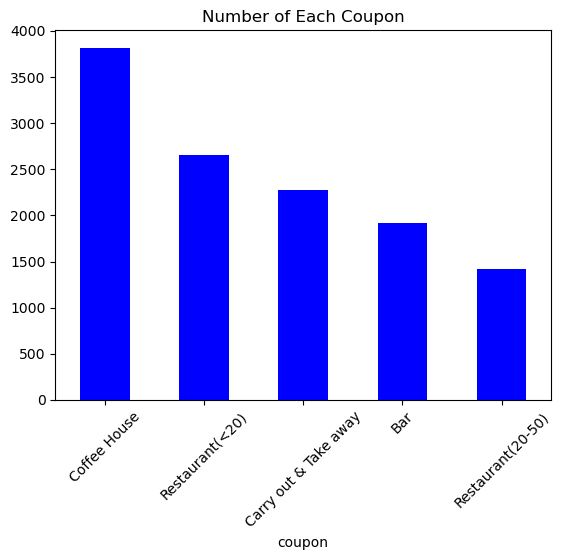

In [569]:
data['coupon'].value_counts().plot(kind = 'bar', title = 'Number of Each Coupon', rot = 45, color = 'b')


6. Use a histogram to visualize the temperature column.

<Axes: title={'center': 'Temperature Data'}, xlabel='Temperature F', ylabel='Observations'>

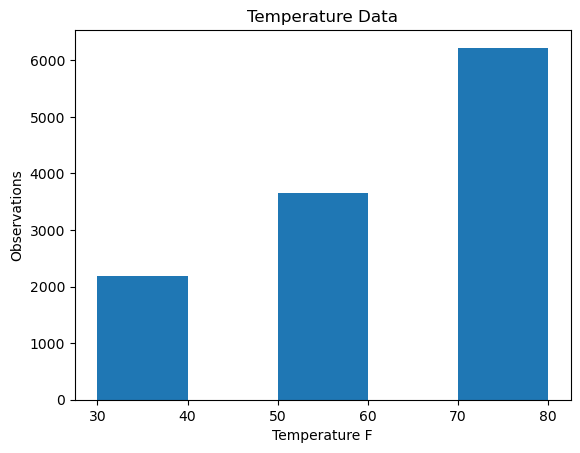

In [572]:
data['temperature'].plot(kind = 'hist', bins=5, xlabel = 'Temperature F', ylabel = 'Observations', title = 'Temperature Data')


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [579]:
df_bar_coupons = data.loc[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


<Axes: title={'center': 'Percentage of Bar Coupon Acceptance'}>

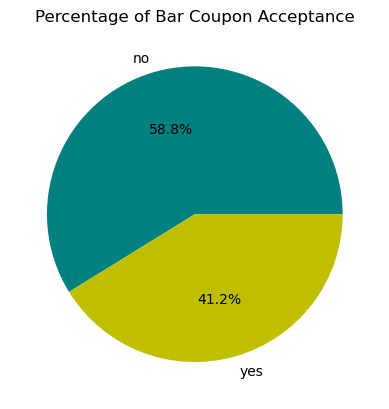

In [582]:
df_bar_coupons.coupon_accepted.value_counts().plot(kind='pie', title = 'Percentage of Bar Coupon Acceptance', ylabel = '', autopct = '%1.1f%%', colors = ['teal', 'y'])

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


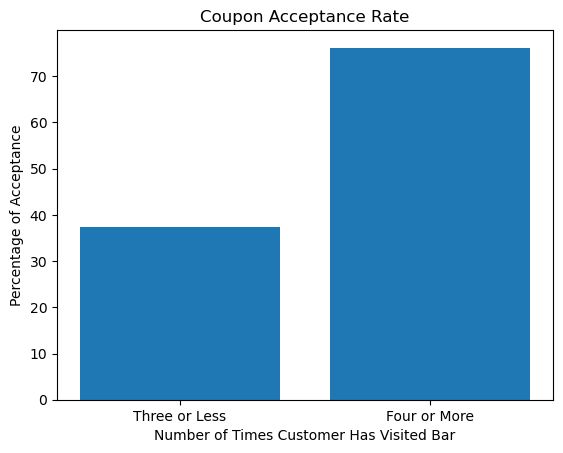

In [585]:
#Get total number of Coupons for each bar frequency group
total_coupons_3_or_less = df_bar_coupons.loc[(df_bar_coupons['Bar'] == 'never') | (df_bar_coupons['Bar'] == 'less1') | (df_bar_coupons['Bar'] == '1~3')]
total_coupons_4_or_more = df_bar_coupons.loc[(df_bar_coupons['Bar'] == '4~8') | (df_bar_coupons['Bar'] == 'gt8')]

#Filter out Accepted Coupons group for each frequency
accepted_3_or_less = total_coupons_3_or_less.loc[(total_coupons_3_or_less['coupon_accepted'] == 'yes')]
accepted_4_or_more = total_coupons_4_or_more.loc[(total_coupons_4_or_more['coupon_accepted'] == 'yes')]

#Get Ratio of Acceptance for each group
ratio_accepted_3_or_less = (len(accepted_3_or_less)/len(total_coupons_3_or_less))*100
ratio_accepted_4_or_more = (len(accepted_4_or_more)/len(total_coupons_4_or_more))*100

#Crate Bar graph of acceptance ratios of each group
data = [ratio_accepted_3_or_less, ratio_accepted_4_or_more]
labels = ['Three or Less', 'Four or More']

plt.bar(labels, data)
plt.xlabel('Number of Times Customer Has Visited Bar')
plt.ylabel('Percentage of Acceptance')
plt.title('Coupon Acceptance Rate')

plt.show()

Observation:


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [588]:
#clean data. convert age to int
df_bar_coupons['age'] = df_bar_coupons['age'].str.replace('50plus','50').str.replace('below21','20')
df_bar_coupons['age'] = df_bar_coupons['age'].astype(int)


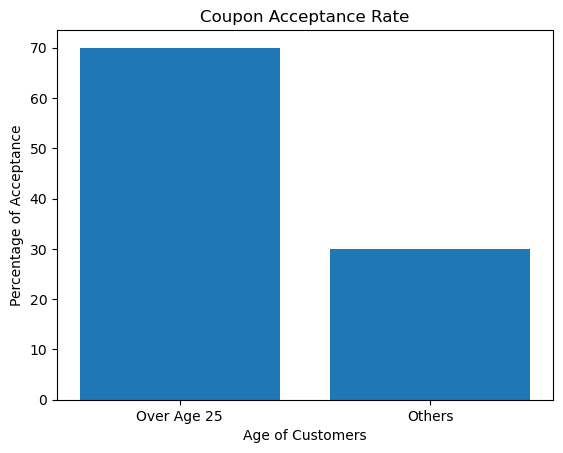

In [590]:
#Get total number of Coupons for Customers who visit more than once a month
total_over_25_bar = df_bar_coupons.loc[((df_bar_coupons['Bar'] == '1-3') | (df_bar_coupons['Bar'] == '4-8') 
        | (df_bar_coupons['Bar'] == 'gt8')) & (df_bar_coupons['age'] > 25)]

total_other_bar = df_bar_coupons.loc[(df_bar_coupons['Bar'] == 'less1') | (df_bar_coupons['Bar'] == 'never')]
total_other_bar2 = df_bar_coupons.loc[((df_bar_coupons['Bar'] == '1-3') | (df_bar_coupons['Bar'] == '4-8') 
        | (df_bar_coupons['Bar'] == 'gt8')) & (df_bar_coupons['age'] <= 25)]

df_others = pd.concat([total_other_bar, total_other_bar2])

total_other = total_other_bar['Bar'].count() + total_other_bar2['Bar'].count()

#Ratio of accepted coupons
accepted_over_25 = total_over_25_bar.loc[(total_over_25_bar['coupon_accepted'] == 'yes')]
accepted_others = df_others.loc[(df_others['coupon_accepted'] == 'yes')]

#Get Ratio of Acceptance for each group
ratio_accepted_over_25 = (len(accepted_over_25)/len(total_over_25_bar))*100
ratio_accepted_others = (len(accepted_others)/len(df_others))*100

#Crate Bar graph of acceptance ratios of each group
data = [ratio_accepted_over_25, ratio_accepted_others]
labels = ['Over Age 25', 'Others']

plt.bar(labels, data)
plt.xlabel('Age of Customers')
plt.ylabel('Percentage of Acceptance')
plt.title('Coupon Acceptance Rate')

plt.show()


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


<Axes: title={'center': 'Percentage of Bar Coupon Acceptance'}>

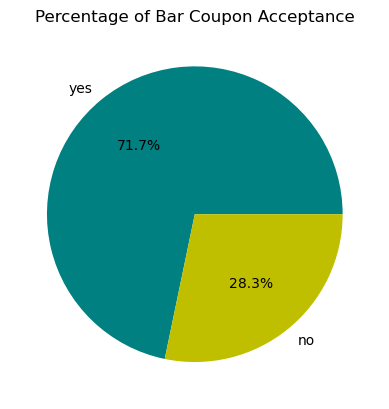

In [593]:
#Get total number of Coupons for Customers who fit criteria
total_filtered_df = df_bar_coupons.loc[(
        (df_bar_coupons['Bar'] == '1-3') | (df_bar_coupons['Bar'] == '4-8') | (df_bar_coupons['Bar'] == 'gt8')) & 
        (df_bar_coupons['passanger'] != 'Kid{s}') &
        (df_bar_coupons['occupation'] != 'Farming Fishing & Forestry')]

#Crate Pie chart of acceptance ratios of each group
total_filtered_df.coupon_accepted.value_counts().plot(kind='pie', title = 'Percentage of Bar Coupon Acceptance', ylabel = '', autopct = '%1.1f%%', colors = ['teal', 'y'])

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [596]:
#Prep income data to filter on
df_bar_coupons['income'] = df_bar_coupons['income'].str.replace('$','')
df_bar_coupons['income'] = df_bar_coupons['income'].str.replace('Less than 12500', '0 - 12500')
df_bar_coupons[['low_income', 'high_income']] = df_bar_coupons['income'].str.split(' - ', expand = True)
df_bar_coupons.dropna(subset=['high_income'], inplace=True)
df_bar_coupons['high_income'] = df_bar_coupons['high_income'].astype(int)


<Axes: title={'center': 'Percentage of Bar Coupon Acceptance'}>

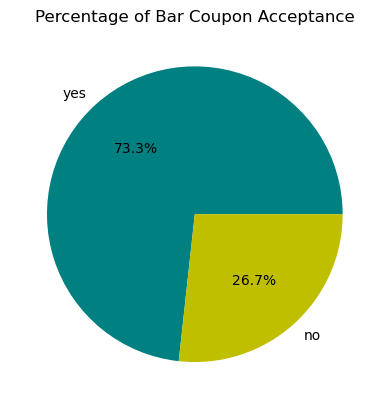

In [598]:
#Get total number of Coupons for Customers who fit criteria
df_bar_no_kids_not_widowed = df_bar_coupons.loc[(
        (df_bar_coupons['Bar'] == '1-3') | (df_bar_coupons['Bar'] == '4-8') | (df_bar_coupons['Bar'] == 'gt8')) & 
        (df_bar_coupons['passanger'] != 'Kid{s}') &
        (df_bar_coupons['maritalStatus'] != 'Widowed')]

df_bar_under_age_30 = df_bar_coupons.loc[(
        (df_bar_coupons['Bar'] == '1-3') | (df_bar_coupons['Bar'] == '4-8') | (df_bar_coupons['Bar'] == 'gt8')) & 
        (df_bar_coupons['age'] <= 30)]

df_cheap_restaurants_less_50k_income = df_bar_coupons.loc[(
        (df_bar_coupons['Bar'] == '1-3') | (df_bar_coupons['Bar'] == '4-8') | (df_bar_coupons['Bar'] == 'gt8')) & 
        (df_bar_coupons['high_income'] <= 50000)]

df_all_criteria = pd.concat([df_bar_no_kids_not_widowed, df_bar_under_age_30, df_cheap_restaurants_less_50k_income])

#Crate Pie chart of acceptance ratios of each group
df_all_criteria.coupon_accepted.value_counts().plot(kind='pie', title = 'Percentage of Bar Coupon Acceptance', ylabel = '', autopct = '%1.1f%%', colors = ['teal', 'y'])


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I drew the following from my observations:
For bar coupons, a customer is twice if not more likely to accept the coupon if any of the following fit their criteria:
- The customer visits bars 4 or more times a month
- The customer is over the age of 25 and frequents bars
- The customer has no kids in the car, and frequents bars (Here the customer is almost 4 times as likely to accept the coupon)
- The customer frequently visits bars and makes less than 50k a year
- The customer frequently visits bars and is under the age of 30
- The customer frequently visits bars, is not widowed, and has no kids in the car

Most of the points have the following thing in common: The customer will likely accept a bar coupon if they visit bars mroe than 3 times in a given month and is presented with a coupon. 


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  